	- Loading the data...
/home/almusawiaf/MyDocuments/PhD_Projects/PSG_SURVIVAL_ANALYSIS/Data/203_Diagnoses/L_M_G_E_Included/1000/HGNN_data


/home/almusawiaf/MyDocuments/PhD_Projects/PSG_SURVIVAL_ANALYSIS/HGNN/src/weighted_sum_precision/GNN_functions_patients_only.py:245: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

	- Generating the Data structure ...
	- Generating the train, test, and validation sets...
	- Number of meta-paths used is :45
	- Preparing the model...
	- Epochs...
Epoch: 1/150, Loss: 4.1261, Val Precision: 0.2761, ACC: 0.0000, top_k: 0.2760, top_k=1: 0.2760
Epoch: 2/150, Loss: 3.9791, Val Precision: 0.2744, ACC: 0.0000, top_k: 0.2747, top_k=1: 0.2747
Epoch: 3/150, Loss: 3.7438, Val Precision: 0.2738, ACC: 0.0000, top_k: 0.2747, top_k=1: 0.2747
Epoch: 4/150, Loss: 3.4507, Val Precision: 0.2733, ACC: 0.0000, top_k: 0.2773, top_k=1: 0.2773
Epoch: 5/150, Loss: 3.1239, Val Precision: 0.3233, ACC: 0.0000, top_k: 0.2773, top_k=1: 0.2773
Epoch: 6/150, Loss: 2.7896, Val Precision: 0.3804, ACC: 0.0000, top_k: 0.2773, top_k=1: 0.2773
Epoch: 7/150, Loss: 2.4790, Val Precision: 0.3529, ACC: 0.0000, top_k: 0.2840, top_k=1: 0.2840
Epoch: 8/150, Loss: 2.2172, Val Precision: 0.3136, ACC: 0.0000, top_k: 0.2853, top_k=1: 0.2853
Epoch: 9/150, Loss: 2.0015, Val Precision: 0.4030, ACC: 0.0000, top_k: 0.2

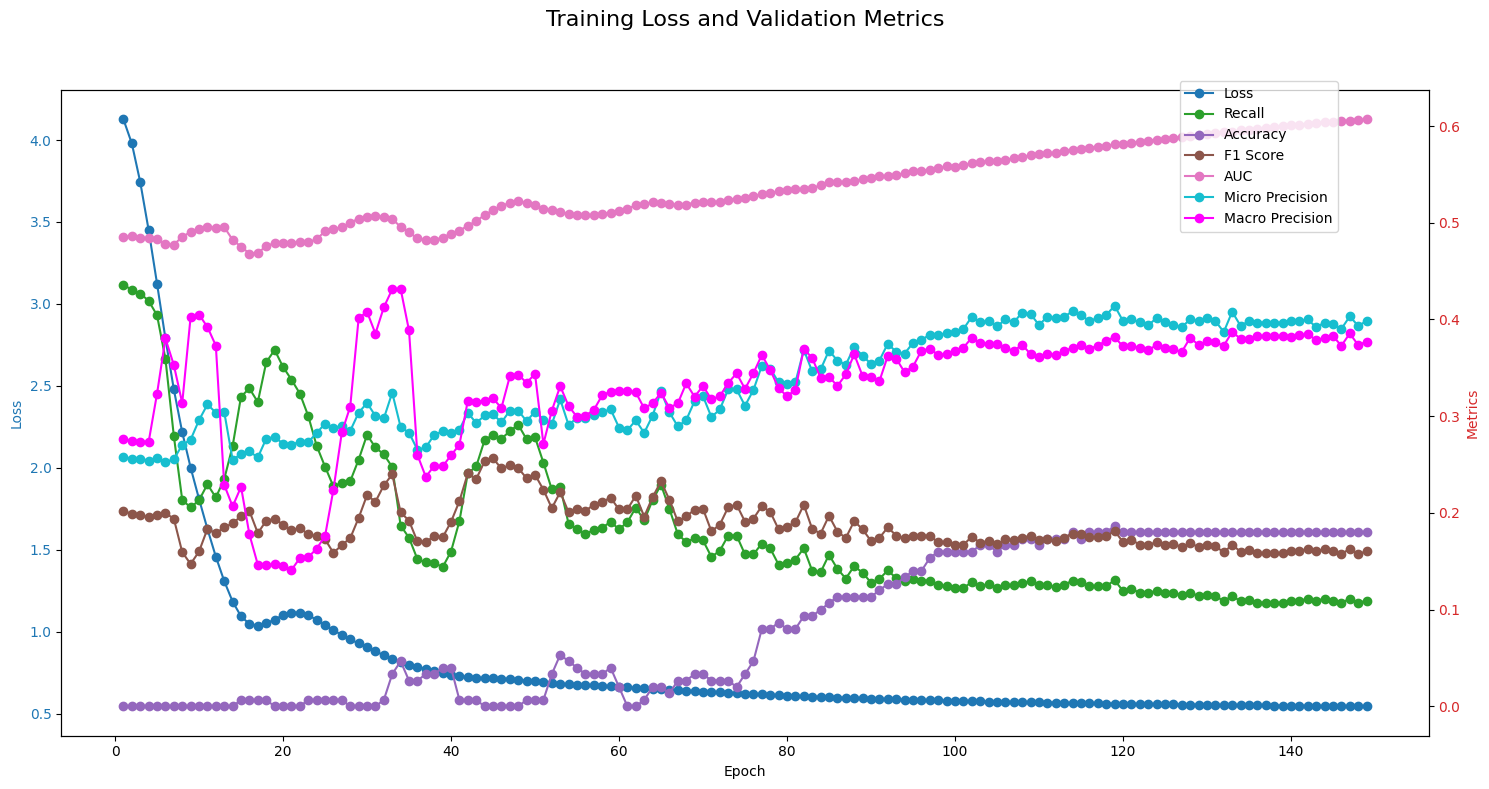

In [1]:
import sys, os

sys.path.append('/lustre/home/almusawiaf/PhD_Projects/HGNN_Project2/GNN_Models/weighted_sum_precision')
from GNN_functions_patients_only import *
from GNN_SAGE import *
from GNN_GCN import *


if __name__ == "__main__":
    num_Sample     = int(os.getenv('num_Sample', 15000))  # Default to 10000 if not set
    num_Labels     = int(os.getenv('NUM_DISEASES', 203))  # Default to 100 if not set
    num_top_Labels = int(os.getenv('NUM_TOP_DISEASES', 203))  # Selecting the top most frequent labels
    disease_name   = os.getenv('DISEASE_FILE', f'GEDMPLB')  # Default to 'sample/10000' if not set
    num_Meta_Path  = int(os.getenv('num_Meta_Path', 10))  # Default to 10
    num_epochs     = int(os.getenv('num_epochs', 50))    
    # ============================================================================

    saving_path = f'/lustre/home/almusawiaf/PhD_Projects/HGNN_Project2/Data/{num_Labels}_Diagnoses/{disease_name}/{num_Sample}/HGNN_data'

    GNN_model = SAGE_MLC
    with_SNF = False
    super_class = '' # '_sc'
    
    exp_name = f'{num_epochs}_epochs_SNF{super_class}'

    losses, val_metrics = main(saving_path, 
                               GNN_Model=GNN_model, 
                               num_epochs = num_epochs,
                               with_SNF = with_SNF,
                               exp_name = exp_name,
                               super_class = super_class, 
                               num_Meta_Path = num_Meta_Path,
                               top_k = 5,
                               num_D = num_top_Labels)

    plot_combined_metrics_and_loss(losses, val_metrics)

    if with_SNF:
        save_results(losses, val_metrics, f'{saving_path}/performance_SAGE_{num_epochs}_eps_SNF')
    else:
        save_results(losses, val_metrics, f'{saving_path}/performance_SAGE_{num_epochs}_eps')
